In [76]:
#import sys
#sys.path
#sys.path.append('</Users/shirojean/miniconda2/lib/python2.7/site-packages>')
#!conda info
% matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
sns.set();


# 1.0 Load Data 
Date Source: http://www.eia.gov/coal/data.php#production

In [77]:
#Set index to MSHA ID
df1=pd.read_excel('../data/coalpublic2015.xls',header=2, index_col='MSHA ID')
df1.head()

,Year,Mine Name,Mine State,Mine County,Mine Status,Mine Type,Company Type,Operation Type,Operating Company,Operating Company Address,Union Code,Coal Supply Region,Production (short tons),Average Employees,Labor Hours
MSHA ID,,,,,,,,,,,,,,,
103381,2015,Jesse Creek H.W.M.,Alabama,Bibb,Active,Surface,Indepedent Producer Operator,Mine only,"Jesse Creek Mining,llc","1615 Kent Dairy Rd, Alabaster, AL 35007",NaN,Appalachia Southern,62598,6,13713
103246,2015,Bear Creek,Alabama,Franklin,Temporarily closed,Surface,Indepedent Producer Operator,Mine only,"Birmingham Coal & Coke Co., In","912 Edenton Street, Birmingham, AL 35242",NaN,Appalachia Southern,25481,9,17641
103451,2015,Knight Mine,Alabama,Franklin,Temporarily closed,Surface,Indepedent Producer Operator,Mine only,"Birmingham Coal & Coke Co., In","P.O. Box 354, Lynn, AL 35242",NaN,Appalachia Southern,121474,21,51729
102933,2015,Mine No 2,Alabama,Jackson,Temporarily closed,Surface,Indepedent Producer Operator,Mine only,"Alabama Carbon, Llc","5957 Windswept Blvd, Wise, VA 24293",NaN,Appalachia Southern,3939,5,5287
100329,2015,Concord Mine,Alabama,Jefferson,Active,Underground,Operating Subsidiary,Preparation Plant,Oak Grove Resources Llc,"8360 Taylors Ferry Rd, Hueytown, AL 35023",United Mine Workers Of America,Appalachia Southern,0,52,119679


## 1.1 Preprocess Data
From the dataframe, we can see the header column starts and row 2; Need to process data in a more clean way

In [78]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1171 entries, 103381 to 1518524
Data columns (total 15 columns):
Year                         1171 non-null int64
Mine Name                    1171 non-null object
Mine State                   1171 non-null object
Mine County                  1171 non-null object
Mine Status                  1171 non-null object
Mine Type                    1171 non-null object
Company Type                 1171 non-null object
Operation Type               1171 non-null object
Operating Company            1171 non-null object
Operating Company Address    1171 non-null object
Union Code                   85 non-null object
Coal Supply Region           1170 non-null object
Production (short tons)      1171 non-null int64
Average Employees            1171 non-null int64
Labor Hours                  1171 non-null int64
dtypes: int64(4), object(11)
memory usage: 146.4+ KB


In [79]:
#take a peek on what is in each colume
df1['Company Type'].unique()

array([u'Indepedent Producer Operator', u'Operating Subsidiary',
       u'Contractor'], dtype=object)

In [80]:
# replace the mispelling of the workd indepedent
df1['Company Type'].replace(to_replace='Indepedent Producer Operator', 
                            value = 'Independent Producer Operator', inplace=True)

In [81]:
df1 ['Company Type'].head()

MSHA ID
103381    Independent Producer Operator
103246    Independent Producer Operator
103451    Independent Producer Operator
102933    Independent Producer Operator
100329             Operating Subsidiary
Name: Company Type, dtype: object

In [82]:
#rename columns to include underscore the remove the spaces between the words ind_Producer_operator
df1.rename(columns=lambda x: x.replace(" ", "_"), inplace=True) 
df1.head()

,Year,Mine_Name,Mine_State,Mine_County,Mine_Status,Mine_Type,Company_Type,Operation_Type,Operating_Company,Operating_Company_Address,Union_Code,Coal_Supply_Region,Production_(short_tons),Average_Employees,Labor_Hours
MSHA ID,,,,,,,,,,,,,,,
103381,2015,Jesse Creek H.W.M.,Alabama,Bibb,Active,Surface,Independent Producer Operator,Mine only,"Jesse Creek Mining,llc","1615 Kent Dairy Rd, Alabaster, AL 35007",NaN,Appalachia Southern,62598,6,13713
103246,2015,Bear Creek,Alabama,Franklin,Temporarily closed,Surface,Independent Producer Operator,Mine only,"Birmingham Coal & Coke Co., In","912 Edenton Street, Birmingham, AL 35242",NaN,Appalachia Southern,25481,9,17641
103451,2015,Knight Mine,Alabama,Franklin,Temporarily closed,Surface,Independent Producer Operator,Mine only,"Birmingham Coal & Coke Co., In","P.O. Box 354, Lynn, AL 35242",NaN,Appalachia Southern,121474,21,51729
102933,2015,Mine No 2,Alabama,Jackson,Temporarily closed,Surface,Independent Producer Operator,Mine only,"Alabama Carbon, Llc","5957 Windswept Blvd, Wise, VA 24293",NaN,Appalachia Southern,3939,5,5287
100329,2015,Concord Mine,Alabama,Jefferson,Active,Underground,Operating Subsidiary,Preparation Plant,Oak Grove Resources Llc,"8360 Taylors Ferry Rd, Hueytown, AL 35023",United Mine Workers Of America,Appalachia Southern,0,52,119679


In [83]:
len(df1)

1171

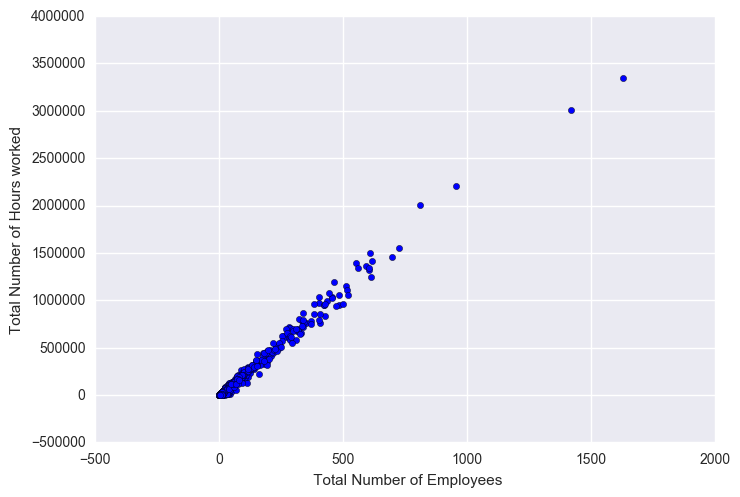

In [84]:
plt.scatter(df1.Average_Employees, df1.Labor_Hours)
plt.xlabel(' Total Number of Employees')
plt.ylabel('Total Number of Hours worked')

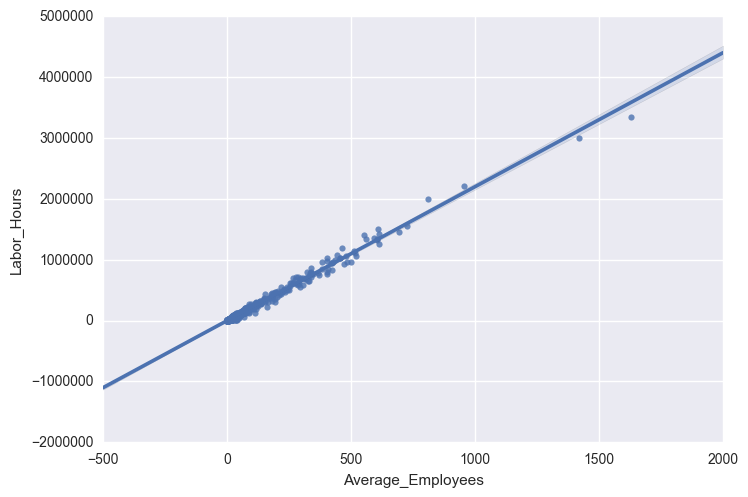

In [85]:
#using seaborn regression plot
sns.regplot(df1.Average_Employees, df1.Labor_Hours, ci=95, n_boot=1000)
plt.savefig("../figures/2016-12-7" + "employees vs hours.png")

The first plot, uses basic scatter plot to show the relationship between Employees vs number of hours work
As the number of emplyees goes up, the total number of hours worked increases at the mines in a linear relationship. 

Second plot, using seaborn; show the same trend, but fits a line in the data, and gives it a bootstrapping in the middle of the line. 

In [86]:
#look at the columns in a couple of ways
 
#df1.info()

for column in df1.columns:
    print column

Year
Mine_Name
Mine_State
Mine_County
Mine_Status
Mine_Type
Company_Type
Operation_Type
Operating_Company
Operating_Company_Address
Union_Code
Coal_Supply_Region
Production_(short_tons)
Average_Employees
Labor_Hours


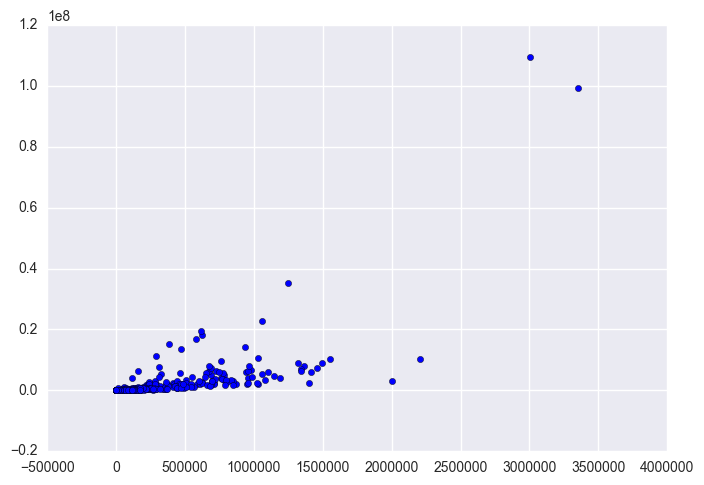

In [87]:
plt.scatter(df1.Labor_Hours, df1['Production_(short_tons)'])

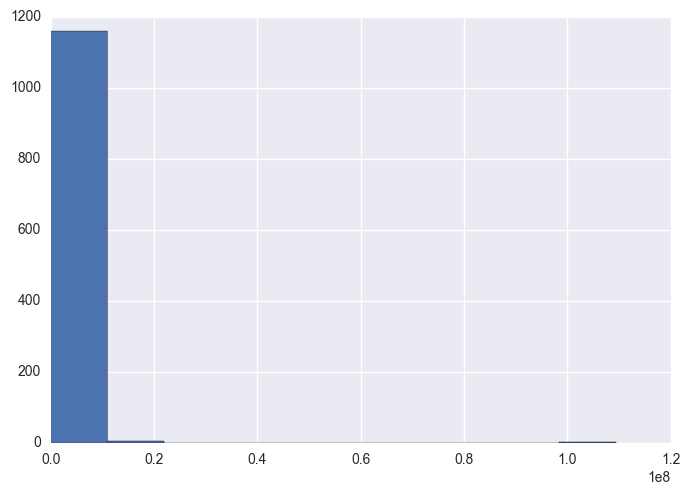

In [88]:
df1['Production_(short_tons)'].hist(bins=10)

In [89]:
#look at the minimum values
min(df1['Production_(short_tons)'])

0

In [90]:
#look at where the production shorttons is eqaul to zero
#df1['Production_(short_tons)'] == 0 

#where is the production equal to zero
#df1[df1['Production_(short_tons)'] == 0] 

 

There are quite a number of mines that had no production values. Next trying to look at the mines that produced at least 1 tons or more. 

### Slicing the data

In [91]:
#where is the production is at least 1 tonne
df = df1[df1['Production_(short_tons)'] >1 ]
df.head()

,Year,Mine_Name,Mine_State,Mine_County,Mine_Status,Mine_Type,Company_Type,Operation_Type,Operating_Company,Operating_Company_Address,Union_Code,Coal_Supply_Region,Production_(short_tons),Average_Employees,Labor_Hours
MSHA ID,,,,,,,,,,,,,,,
103381,2015,Jesse Creek H.W.M.,Alabama,Bibb,Active,Surface,Independent Producer Operator,Mine only,"Jesse Creek Mining,llc","1615 Kent Dairy Rd, Alabaster, AL 35007",NaN,Appalachia Southern,62598,6,13713
103246,2015,Bear Creek,Alabama,Franklin,Temporarily closed,Surface,Independent Producer Operator,Mine only,"Birmingham Coal & Coke Co., In","912 Edenton Street, Birmingham, AL 35242",NaN,Appalachia Southern,25481,9,17641
103451,2015,Knight Mine,Alabama,Franklin,Temporarily closed,Surface,Independent Producer Operator,Mine only,"Birmingham Coal & Coke Co., In","P.O. Box 354, Lynn, AL 35242",NaN,Appalachia Southern,121474,21,51729
102933,2015,Mine No 2,Alabama,Jackson,Temporarily closed,Surface,Independent Producer Operator,Mine only,"Alabama Carbon, Llc","5957 Windswept Blvd, Wise, VA 24293",NaN,Appalachia Southern,3939,5,5287
100627,2015,Flat Top Mine,Alabama,Jefferson,Active,Surface,Independent Producer Operator,Mine only,"Cedar Lake Mining, Inc","7802 Highway 78, Cordova, AL 35550",NaN,Appalachia Southern,256521,37,103971


In [92]:
len(df)

853

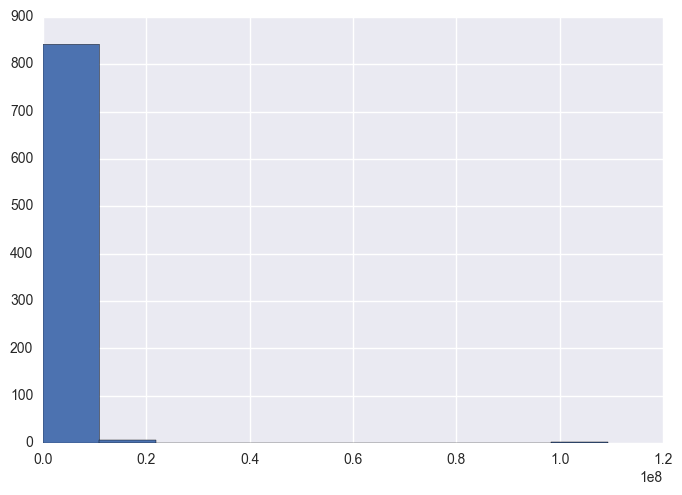

In [93]:
df['Production_(short_tons)'].hist(bins=10)

Still a skewed distribution...Need to standardize/normalize the data by taking the log

In [97]:
#create a new column "log_production" 
df["log_production"]= np.log(df['Production_(short_tons)'])

/Users/shirojean/miniconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


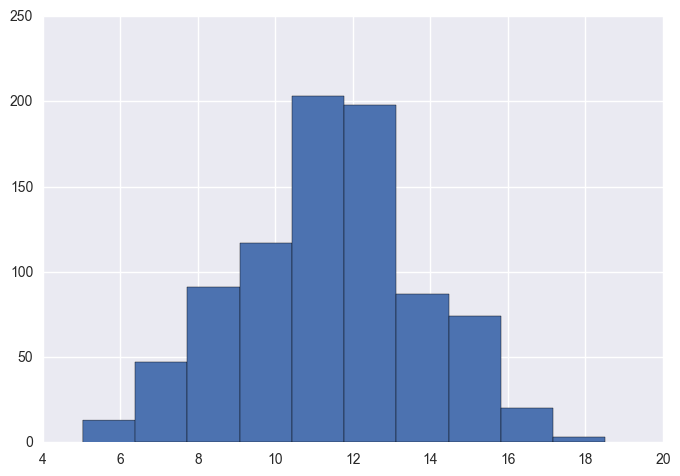

In [98]:
df.log_production.hist()

close to a log normal distribution, thus the production of coal mines follows a log normal distribution. I will stick with this as my prediction variable. 

##### Summary of Steps
1. Loaded the data
2. Renames the columns
3. Variable transformation
4. Identified the target variable (production of mines)
5. Save the clean version of dataset

In [100]:
#save the cleaner version of dataframe for future analyis
df.to_csv('../data/cleaned_coalpublic2015.csv')